In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import rubin_sim.maf as maf

In [2]:
weather = maf.get_metric_summaries(summary_source='weather_summary.csv')
base = maf.get_metric_summaries(summary_source='baseline_summary.csv')
summaries = pd.concat([base, weather])
metrics = summaries.columns

In [3]:
variants = maf.get_metric_summaries(summary_source='variants_summary.csv')
runs = ['start_date_footprint_v3.1_10yrs', 'start_date_v3.1_10yrs']
summaries = pd.concat([summaries, variants.loc[runs]], join='outer')[metrics]

In [4]:
summaries

metric,25th%ile AGN SF_uncert g band HealpixSlicer,25th%ile AGN SF_uncert i band HealpixSlicer,25th%ile AGN SF_uncert r band HealpixSlicer,25th%ile AGN SF_uncert u band HealpixSlicer,25th%ile AGN SF_uncert y band HealpixSlicer,25th%ile AGN SF_uncert z band HealpixSlicer,25th%ile AGN_TimeLag_100_days all bands HealpixSlicer,25th%ile AGN_TimeLag_100_days g band HealpixSlicer,25th%ile AGN_TimeLag_100_days i band HealpixSlicer,25th%ile AGN_TimeLag_100_days r band HealpixSlicer,...,fONv MedianNvis fO WFD HealpixSubsetSlicer,fONv MinNvis fO All sky HealpixSlicer,fONv MinNvis fO HealpixSlicer,fONv MinNvis fO WFD HealpixSubsetSlicer,fONv/benchmark MedianNvis fO All sky HealpixSlicer,fONv/benchmark MedianNvis fO HealpixSlicer,fONv/benchmark MedianNvis fO WFD HealpixSubsetSlicer,fONv/benchmark MinNvis fO All sky HealpixSlicer,fONv/benchmark MinNvis fO HealpixSlicer,fONv/benchmark MinNvis fO WFD HealpixSubsetSlicer
run,,,,,,,,,,,,,,,,,,,,,
baseline_v3.0_10yrs,0.042871,0.034274,0.034479,0.040872,0.034478,0.033370,7.594019,8.426726,2.552697,2.490909,...,-666.0,747.0,747.0,-666.0,0.963636,0.963636,-666.000000,0.905455,0.905455,-666.000000
proto_baseline_uz_v3.1_10yrs,0.045594,0.033575,0.034396,0.043011,0.034113,0.033651,7.429116,8.094878,2.553461,2.469442,...,-666.0,741.0,741.0,-666.0,0.957576,0.957576,-666.000000,0.898182,0.898182,-666.000000
proto_baseline_uzy_v3.1_10yrs,0.046220,0.033518,0.035012,0.043528,0.034278,0.033169,7.412290,8.208113,2.521371,2.444757,...,-666.0,737.0,737.0,-666.0,0.951515,0.951515,-666.000000,0.893333,0.893333,-666.000000
weather_cloudso0v3.1_10yrs,0.046552,0.034058,0.034929,0.042069,0.034788,0.033910,7.461653,9.295256,2.532292,2.458776,...,-666.0,740.0,740.0,-666.0,0.955152,0.955152,-666.000000,0.896970,0.896970,-666.000000
weather_cloudso10v3.1_10yrs,0.047739,0.034709,0.035985,0.040938,0.036501,0.034888,7.826585,7.635733,2.685151,2.616134,...,839.0,788.0,788.0,788.0,1.016970,1.016970,1.016970,0.955152,0.955152,0.955152
weather_cloudso11v3.1_10yrs,0.045442,0.034526,0.035972,0.041386,0.036498,0.034791,7.809036,8.024674,2.682629,2.614819,...,839.0,790.0,790.0,790.0,1.016970,1.016970,1.016970,0.957576,0.957576,0.957576
weather_cloudso1v3.1_10yrs,0.043998,0.033530,0.034768,0.041731,0.034556,0.032916,7.512664,8.025516,2.580071,2.504135,...,805.0,756.0,756.0,756.0,0.975758,0.975758,0.975758,0.916364,0.916364,0.916364
weather_cloudso20v3.1_10yrs,0.046810,0.035338,0.036873,0.041740,0.036469,0.035388,7.955550,8.978292,2.693079,2.624929,...,840.0,789.0,789.0,789.0,1.018182,1.018182,1.018182,0.956364,0.956364,0.956364
weather_cloudso21v3.1_10yrs,0.048996,0.034959,0.037108,0.042284,0.036913,0.035065,7.811096,8.360658,2.668816,2.599510,...,835.0,784.0,784.0,784.0,1.012121,1.012121,1.012121,0.950303,0.950303,0.950303


In [5]:
variants = ['baseline_v3.0_10yrs', 
            'start_date_v3.1_10yrs', 
            'start_date_footprint_v3.1_10yrs',
           'proto_baseline_uz_v3.1_10yrs',
           'proto_baseline_uzy_v3.1_10yrs']

clouds = [c for c in summaries.index if c.startswith('weather')]
offsets = []
for c in clouds:
    offset = int(c.split('so')[-1].split('v')[0])
    offsets.append(offset)
cloudorder = np.argsort(offsets)
co = []
for i in cloudorder:
    co.append(clouds[i])
clouds = co

In [6]:
metric_sets = maf.get_metric_sets('metric_sets.json')
msets = list(metric_sets.groupby('metric set').first().index)
print(msets)

['AGN N QSO', 'AGN SF', 'AGN SF DDF', 'AGN TimeLag 100 days DDF', 'AGN TimeLag 5 days DDF', 'AGN short', 'AGN timelag', 'DDF Cadence', 'DDF Depths', 'DESC WFD', 'GP filters', 'GP footprint', 'GP season', 'GP visit', 'N Visits', 'SCOC', 'SL IQ', 'SL TDC', 'SNIa DDF', 'SNSL DDF', 'SRD', 'SSO N Objs', 'SSO discovery', 'SSO discovery options', 'SSO fraction 3 bands', 'SSO fraction 4 bands', 'SSO fraction 5 bands', 'SSO fraction 6 bands', 'SSO lightcurve inversion', 'Stars', 'TVS KNe', 'TVS KNe short', 'TVS PeriodModulation', 'TVS PeriodicDetect', 'TVS Presto', 'TVS TDE', 'TVS Tgaps', 'TVS XRB', 'TVS anomalies', 'TVS microlensing all', 'TVS microlensing short', 'TVS short', 'WFD Depths', 'cadence', 'galaxies', 'plot areas', 'radar', 'short description']


metric,Identity CountUnique night All visits UniSlicer,Median Nvisits All visits OneDSlicer,Identity Median slewTime All visits UniSlicer,Identity Mean slewTime All visits UniSlicer,Identity Nvisits All visits UniSlicer
run,,,,,
baseline_v3.0_10yrs,0.995757,0.946106,1.004024,1.008702,0.959573
proto_baseline_uz_v3.1_10yrs,0.994342,0.943403,1.003853,1.009049,0.958417
proto_baseline_uzy_v3.1_10yrs,0.994342,0.944754,1.003169,1.010360,0.957815
weather_cloudso0v3.1_10yrs,0.990453,0.949485,1.003186,1.010399,0.962753
weather_cloudso10v3.1_10yrs,1.015912,0.986315,1.001117,1.001656,1.015144
weather_cloudso11v3.1_10yrs,1.014498,0.991384,1.000029,1.000264,1.015305
weather_cloudso1v3.1_10yrs,1.007072,0.955567,1.002664,1.008499,0.981304
weather_cloudso20v3.1_10yrs,1.011669,1.017064,0.999854,0.998074,1.013888
weather_cloudso21v3.1_10yrs,1.000000,1.012333,0.999294,0.997488,1.006700


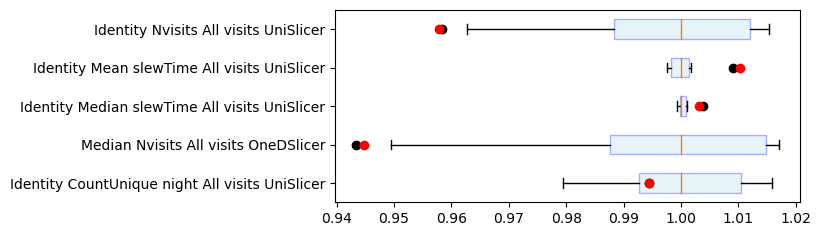

In [9]:
# First check on number of visits
metrics = ["Identity CountUnique night All visits UniSlicer",
           "Median Nvisits All visits OneDSlicer",
           "Identity Median slewTime All visits UniSlicer",
           'Identity Mean slewTime All visits UniSlicer',
          "Identity Nvisits All visits UniSlicer"]

baseline = 'baseline_v3.0_10yrs'
bruns = ['proto_baseline_uz_v3.1_10yrs', 'proto_baseline_uzy_v3.1_10yrs']
run_colors = {'proto_baseline_uz_v3.1_10yrs': 'k', 'proto_baseline_uzy_v3.1_10yrs':'r'}

clouds = [r for r in summaries.index if 'weather' in r]
#variants = [r for r in summaries.index if 'weather' not in r]

pos_y = np.arange(1, len(metrics)+1)

normdf = maf.normalize_metric_summaries(clouds, summaries[metrics])

fig = plt.figure(figsize=(6, len(metrics)/2))
ax = plt.gca()
#bplot = plt.boxplot(normdf.loc[variants][metrics], vert=False, positions=pos_y, patch_artist=True, showfliers=False)
#for patch in bplot['boxes']:
#    patch.set(edgecolor='red', facecolor='pink', alpha=0.4)
bplot = plt.boxplot(normdf.loc[clouds][metrics], #summaries.loc[clouds][metrics], 
                    vert=False, 
                    positions=pos_y, 
                    patch_artist=True, showfliers=False)
for patch in bplot['boxes']:
    patch.set(edgecolor='blue', facecolor='lightblue', alpha=0.3)
for r in bruns:
    plt.plot(normdf.loc[r][metrics], pos_y, 'o', color=run_colors[r])
    #plt.plot(summaries.loc[r][metrics], pos_y, 'o', color=run_colors[r])
ax.set_yticks(pos_y)
ax.set_yticklabels(metrics)
#plt.axvline(1, color='grey', linestyle='-', alpha=0.5)

normdf

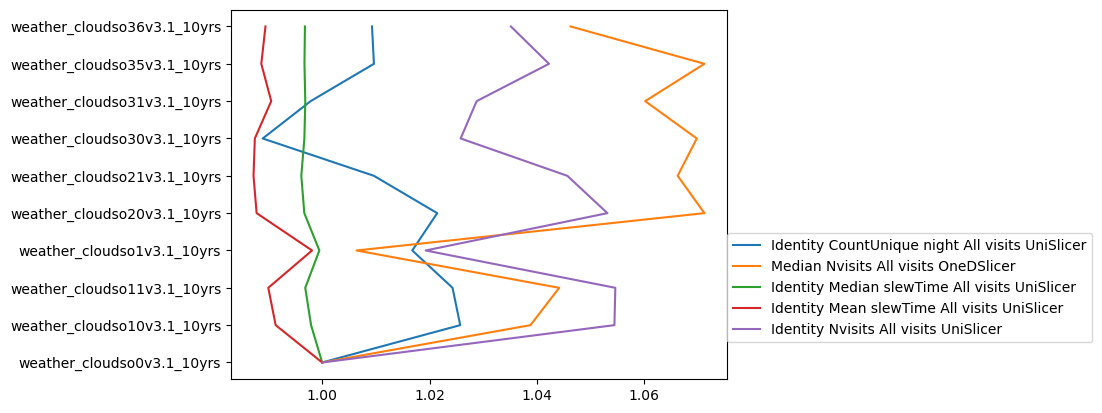

In [11]:
for m in metrics:
    plt.plot(summaries.loc[clouds][m]/summaries.loc[clouds[0]][m], clouds, label=m)
plt.legend(loc=(1.0, 0.1))

metric,fONv MedianNvis fO HealpixSlicer,Median Parallax Uncert (18k) Parallax Uncert @ 22.4 HealpixSlicer,Median Proper Motion Uncert (18k) Proper Motion Uncert @ 20.5 HealpixSlicer,Mean WeakLensingNvisits gri band non-DD HealpixSlicer,3x2ptFoM Exgalm5WithCuts i band non-DD year 10 HealpixSlicer,Total detected SNNSNMetric_reducen_sn DDF excluded HealpixSlicer,Total detected KNePopMetric_all_multi_color_detect all models UserPointsSlicer,Total detected KNePopMetric_single_ztfrest_simple single model UserPointsSlicer,Total detected XRBPopMetric_early_detect UserPointsSlicer,Total detected MicrolensingMetric_detect tE 20_30 days UserPointsSlicer,...,"Total N Stars, crowding N stars to Precision 0.20 r HealpixSlicer","VolumeSum Brown Dwarf, L4 HealpixSlicer",Sum young_stars HealpixSlicer,N Galaxies (all) DepthLimitedNumGalaxiesMetric i band galaxies non-DD HealpixSlicer,Area M_v>-6.4 LVDwarfs gi HealpixSlicer,Area M_v>0.0 LVDwarfs gi SCP HealpixSlicer,CumulativeCompleteness H <= 16.000000 DiscoveryNChances NEO 3 pairs in 30 nights detection loss MoObjSlicer,CumulativeCompleteness H <= 22.000000 DiscoveryNChances NEO 3 pairs in 30 nights detection loss MoObjSlicer,CumulativeCompleteness H <= 6.000000 DiscoveryNChances TNO 3 pairs in 15 nights detection loss MoObjSlicer,FractionPop Lightcurve Inversion H = 18.000000 LightcurveInversionAsteroid MBA MoObjSlicer
run,,,,,,,,,,,,,,,,,,,,,
baseline_v3.0_10yrs,795.0,2.378434,0.195380,422.539291,38.643260,109475.798536,2004.0,528.0,1950.0,3239.0,...,2.740471e+09,584346.055587,4.729394e+06,4.625109e+09,12817.692550,1534.228783,0.9418,0.605064,0.695618,0.153431
proto_baseline_uz_v3.1_10yrs,790.0,2.420126,0.196222,420.051160,39.169716,109488.855872,1814.0,518.0,2019.0,3317.0,...,2.788841e+09,582479.351626,4.857958e+06,4.675791e+09,12817.692550,1621.515323,0.9422,0.606036,0.701883,0.153431
proto_baseline_uzy_v3.1_10yrs,785.0,2.440079,0.197864,417.254262,38.873529,109152.859285,1816.0,468.0,1971.0,3264.0,...,2.777012e+09,586355.943269,4.844688e+06,4.649084e+09,12733.763185,1564.443355,0.9406,0.602918,0.698893,0.143629
weather_cloudso0v3.1_10yrs,788.0,2.446549,0.198641,418.751836,38.951315,109430.931145,1842.0,488.0,1995.0,3206.0,...,2.838363e+09,579707.886196,4.924881e+06,4.660905e+09,12518.904012,1514.085736,0.9418,0.603570,0.698175,0.136827
weather_cloudso10v3.1_10yrs,839.0,2.413715,0.192041,446.349438,39.457083,116343.832530,1850.0,445.0,2032.0,3287.0,...,2.788924e+09,575778.263524,4.964491e+06,4.704065e+09,12915.050613,1591.300751,0.9492,0.612134,0.697692,0.167834
weather_cloudso11v3.1_10yrs,839.0,2.441660,0.191477,445.486740,39.414337,115898.142606,1799.0,466.0,2025.0,3174.0,...,2.836318e+09,574563.781944,4.974237e+06,4.697269e+09,12831.121248,1601.372275,0.9460,0.610060,0.698845,0.167634
weather_cloudso1v3.1_10yrs,805.0,2.387507,0.194666,427.842270,39.500168,115778.817440,1897.0,494.0,1974.0,3297.0,...,2.818012e+09,585710.350758,4.882986e+06,4.706344e+09,13193.696103,1530.871609,0.9426,0.609741,0.699075,0.160232
weather_cloudso20v3.1_10yrs,840.0,2.474837,0.198626,445.395899,39.105714,112589.157118,1789.0,463.0,2032.0,3140.0,...,2.870602e+09,573210.346934,4.894669e+06,4.671463e+09,12659.905344,1561.086180,0.9462,0.608354,0.697331,0.163233
weather_cloudso21v3.1_10yrs,835.0,2.454862,0.196785,443.179816,39.120316,110182.852826,1836.0,507.0,2060.0,3207.0,...,2.790428e+09,568598.512926,4.896108e+06,4.674163e+09,12381.259854,1470.442466,0.9494,0.606327,0.697261,0.157832


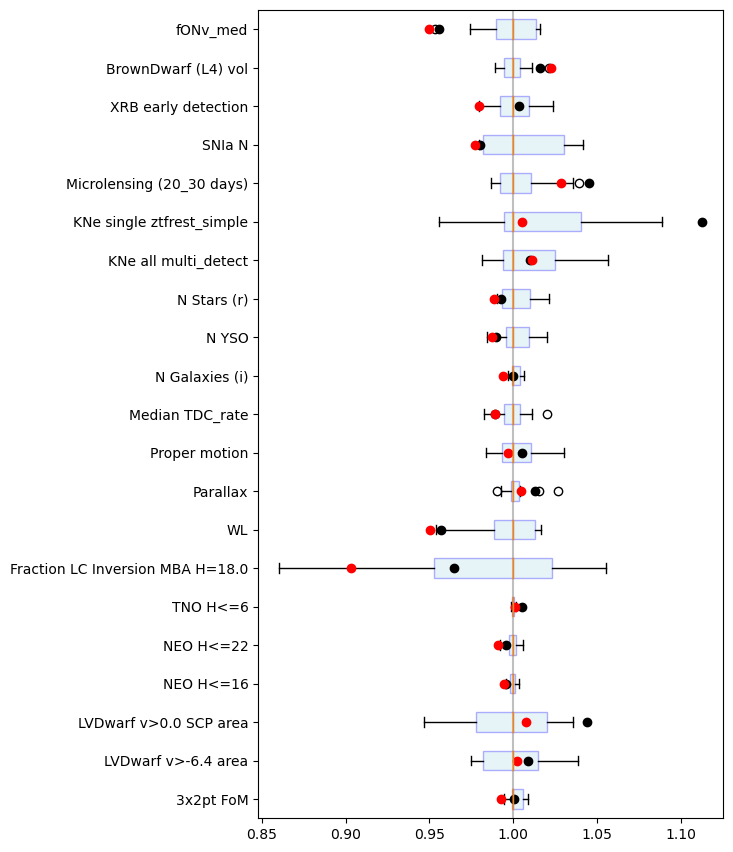

In [12]:
mset = 'SCOC'

normdf = maf.normalize_metric_summaries(clouds, summaries, metric_sets=metric_sets.loc[mset])
normdf.columns = normdf.columns.map(metric_sets.loc[mset].short_name)
metrics = normdf.columns
pos_y = np.arange(1, len(metrics)+1)

fig = plt.figure(figsize=(6, len(metric_sets.loc[mset])/2))
ax = plt.gca()
#bplot = plt.boxplot(normdf.loc[variants][metrics], vert=False, positions=pos_y, patch_artist=True, showfliers=True)
#for patch in bplot['boxes']:
#    patch.set(edgecolor='red', facecolor='pink', alpha=0.4)
bplot = plt.boxplot(normdf.loc[clouds][metrics], vert=False, positions=pos_y, patch_artist=True, showfliers=True)
for patch in bplot['boxes']:
    patch.set(edgecolor='blue', facecolor='lightblue', alpha=0.3)
for r in bruns:
    plt.plot(normdf.loc[r][metrics], pos_y, 'o', color=run_colors[r])
ax.set_yticks(pos_y)
ax.set_yticklabels(metrics)
plt.axvline(1, color='grey', linestyle='-', alpha=0.5)

summaries[metric_sets.loc[mset]['metric']]

In [46]:
msets

['AGN N QSO',
 'AGN SF',
 'AGN SF DDF',
 'AGN TimeLag 100 days DDF',
 'AGN TimeLag 5 days DDF',
 'AGN short',
 'AGN timelag',
 'DDF Cadence',
 'DDF Depths',
 'DESC WFD',
 'GP filters',
 'GP footprint',
 'GP season',
 'GP visit',
 'N Visits',
 'SCOC',
 'SL IQ',
 'SL TDC',
 'SNIa DDF',
 'SNSL DDF',
 'SRD',
 'SSO N Objs',
 'SSO discovery',
 'SSO discovery options',
 'SSO fraction 3 bands',
 'SSO fraction 4 bands',
 'SSO fraction 5 bands',
 'SSO fraction 6 bands',
 'SSO lightcurve inversion',
 'Stars',
 'TVS KNe',
 'TVS KNe short',
 'TVS PeriodModulation',
 'TVS PeriodicDetect',
 'TVS Presto',
 'TVS TDE',
 'TVS Tgaps',
 'TVS XRB',
 'TVS anomalies',
 'TVS microlensing all',
 'TVS microlensing short',
 'TVS short',
 'WFD Depths',
 'cadence',
 'galaxies',
 'plot areas',
 'radar',
 'short description']

metric,"Sum SNNSNMetric DD:ELAISS1_reducen_sn DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer","Median SNNSNMetric DD:ELAISS1_reducezlim DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer",Mean DD:ELAISS1 Median Inter-Night Gap r band UserPointsSlicer,Mean DD:ELAISS1 Median Season Length all bands UserPointsSlicer,"Sum SNNSNMetric DD:XMM_LSS_reducen_sn DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer","Median SNNSNMetric DD:XMM_LSS_reducezlim DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer",Mean DD:XMM_LSS Median Inter-Night Gap r band UserPointsSlicer,Mean DD:XMM_LSS Median Season Length all bands UserPointsSlicer,"Sum SNNSNMetric DD:COSMOS_reducen_sn DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer","Median SNNSNMetric DD:COSMOS_reducezlim DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer",...,Mean DD:ECDFS Median Inter-Night Gap r band UserPointsSlicer,Mean DD:ECDFS Median Season Length all bands UserPointsSlicer,"Sum SNNSNMetric DD:EDFS_reducen_sn DD:EDFS all bands, only DDF observations HealpixSubsetSlicer","Median SNNSNMetric DD:EDFS_reducezlim DD:EDFS all bands, only DDF observations HealpixSubsetSlicer",Mean DD:EDFS Median Inter-Night Gap r band UserPointsSlicer,Mean DD:EDFS Median Season Length all bands UserPointsSlicer,"Sum SNNSNMetric DD:WFD_reducen_sn DD:WFD all bands, only DDF observations HealpixSubsetSlicer","Median SNNSNMetric DD:WFD_reducezlim DD:WFD all bands, only DDF observations HealpixSubsetSlicer",Mean DD:WFD Median Inter-Night Gap r band UserPointsSlicer,Mean DD:WFD Median Season Length all bands UserPointsSlicer
run,,,,,,,,,,,,,,,,,,,,,
baseline_v3.0_10yrs,37.378088,0.546128,7.812795,204.650845,60.363667,0.539335,7.112872,203.760471,362.726856,0.594675,...,7.095284,210.739960,74.734786,0.526724,7.156879,207.744672,NaN,NaN,5.965913,145.781416
proto_baseline_uz_v3.1_10yrs,8.633807,0.565969,7.169888,210.781826,44.327408,0.570450,7.451866,205.776041,362.220035,0.594883,...,7.090026,204.785035,101.968397,0.519997,7.195378,204.758930,NaN,NaN,6.030830,151.710543
proto_baseline_uzy_v3.1_10yrs,178.026152,0.564479,7.132342,209.801042,168.273674,0.567134,7.452287,204.727932,496.606379,0.587677,...,7.092905,204.711404,445.803947,0.524709,7.755387,210.790840,NaN,NaN,6.044200,147.714155
weather_cloudso0v3.1_10yrs,176.214523,0.569684,7.773267,205.851740,202.466247,0.566949,7.795377,204.689549,495.166276,0.590203,...,7.123800,204.786232,461.969641,0.527525,7.137201,207.791802,NaN,NaN,5.046173,141.271820
weather_cloudso10v3.1_10yrs,131.557274,0.561680,7.945911,210.761616,148.545178,0.547304,7.771693,205.629597,486.207661,0.586240,...,7.814144,210.729724,177.734721,0.510529,7.975860,207.820632,NaN,NaN,6.960403,135.281935
weather_cloudso11v3.1_10yrs,183.522499,0.567559,7.743096,209.781363,108.646605,0.548335,7.849819,204.696676,475.864836,0.588965,...,7.943750,210.763594,221.792182,0.507248,7.959118,204.800233,NaN,NaN,7.962561,155.274680
weather_cloudso1v3.1_10yrs,197.136219,0.580159,7.195810,211.636733,185.740662,0.564536,7.784792,207.741910,514.333328,0.592526,...,7.077982,206.767351,487.040797,0.527720,7.142004,209.785434,NaN,NaN,7.043861,149.250515
weather_cloudso20v3.1_10yrs,95.964745,0.558159,7.820107,210.791111,101.437820,0.543628,7.972151,211.678317,499.901193,0.581092,...,7.206192,209.762283,113.677516,0.512062,7.901745,210.730932,NaN,NaN,7.939396,156.202655
weather_cloudso21v3.1_10yrs,112.931172,0.564331,7.982685,205.791927,77.247808,0.536638,7.880839,204.723100,466.178799,0.589584,...,7.741674,210.775653,117.061927,0.511621,8.002410,210.597085,NaN,NaN,5.935490,146.765704


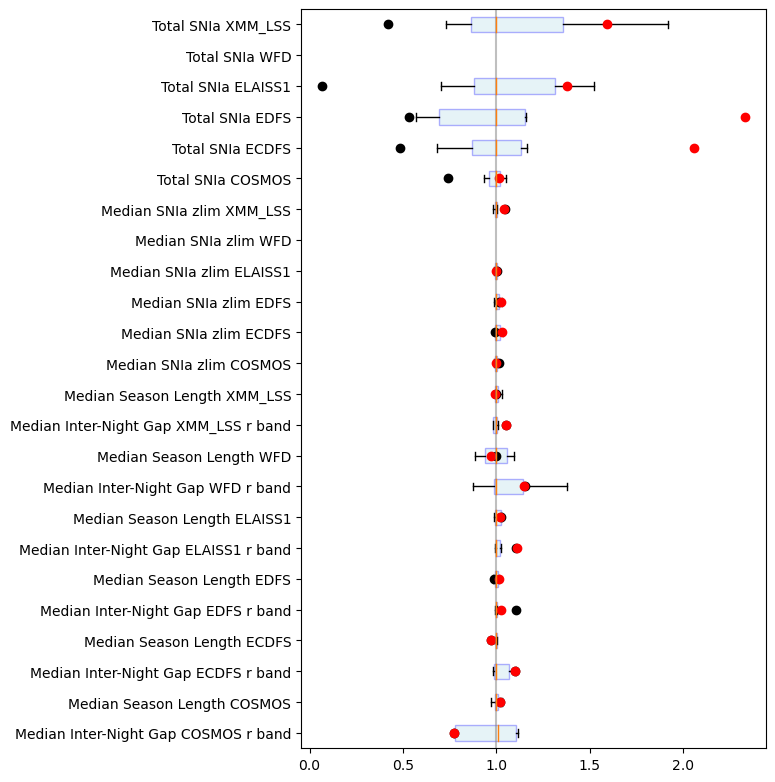

In [15]:
mset = 'SNIa DDF'

normdf = maf.normalize_metric_summaries(clouds, summaries, metric_sets=metric_sets.loc[mset])
normdf.columns = normdf.columns.map(metric_sets.loc[mset].short_name)
metrics = normdf.columns
pos_y = np.arange(1, len(metrics)+1)

fig = plt.figure(figsize=(6, len(metric_sets.loc[mset])/2.5))
ax = plt.gca()
#bplot = plt.boxplot(normdf.loc[variants][metrics], vert=False, positions=pos_y, patch_artist=True, showfliers=True)
#for patch in bplot['boxes']:
#    patch.set(edgecolor='red', facecolor='pink', alpha=0.4)
bplot = plt.boxplot(normdf.loc[clouds][metrics], vert=False, positions=pos_y, patch_artist=True, showfliers=False)
for patch in bplot['boxes']:
    patch.set(edgecolor='blue', facecolor='lightblue', alpha=0.3)
for r in bruns:
    plt.plot(normdf.loc[r][metrics], pos_y, 'o', color=run_colors[r])
ax.set_yticks(pos_y)
ax.set_yticklabels(metrics)
plt.axvline(1, color='grey', linestyle='-', alpha=0.5)

summaries[metric_sets.loc[mset]['metric']]

metric,Median TgapsPercent_2-14hrs u band HealpixSlicer,Median TgapsPercent_2-14hrs g band HealpixSlicer,Median TgapsPercent_2-14hrs r band HealpixSlicer,Median TgapsPercent_2-14hrs i band HealpixSlicer,Median TgapsPercent_2-14hrs z band HealpixSlicer,Median TgapsPercent_2-14hrs y band HealpixSlicer,Median TgapsPercent_1day u band HealpixSlicer,Median TgapsPercent_1day g band HealpixSlicer,Median TgapsPercent_1day r band HealpixSlicer,Median TgapsPercent_1day i band HealpixSlicer,Median TgapsPercent_1day z band HealpixSlicer,Median TgapsPercent_1day y band HealpixSlicer
run,,,,,,,,,,,,
baseline_v3.0_10yrs,0.000000,0.0,1.587302,1.630435,1.923077,0.000000,9.677419,5.084746,11.000000,8.888889,13.333333,5.319149
proto_baseline_uz_v3.1_10yrs,0.000000,0.0,1.754386,1.657459,2.046049,0.000000,9.677419,6.451613,11.167513,9.195402,13.548387,5.769231
proto_baseline_uzy_v3.1_10yrs,0.000000,0.0,1.648352,1.657459,1.886792,0.568182,9.523810,5.797101,9.714286,9.090909,9.433962,5.813953
weather_cloudso0v3.1_10yrs,0.000000,0.0,1.595745,1.724138,1.840491,0.568182,10.204082,5.714286,9.574468,8.994709,9.411765,5.945946
weather_cloudso10v3.1_10yrs,0.000000,0.0,1.562500,1.578947,1.719212,0.526316,8.888889,5.555556,9.803922,8.823529,9.644670,6.315789
weather_cloudso11v3.1_10yrs,0.000000,0.0,1.639344,1.639344,1.840491,0.534759,8.695652,5.882353,10.096154,8.962264,9.356725,5.940594
weather_cloudso1v3.1_10yrs,0.000000,0.0,1.639344,1.675978,1.796407,0.564972,10.526316,6.060606,10.152284,9.090909,9.375000,5.917160
weather_cloudso20v3.1_10yrs,0.000000,0.0,1.587302,1.554404,1.754386,0.546448,9.523810,5.714286,10.052910,8.823529,9.554140,6.185567
weather_cloudso21v3.1_10yrs,0.000000,0.0,1.538462,1.657459,1.775148,0.505051,8.888889,5.633803,10.000000,8.522727,9.195402,6.321839


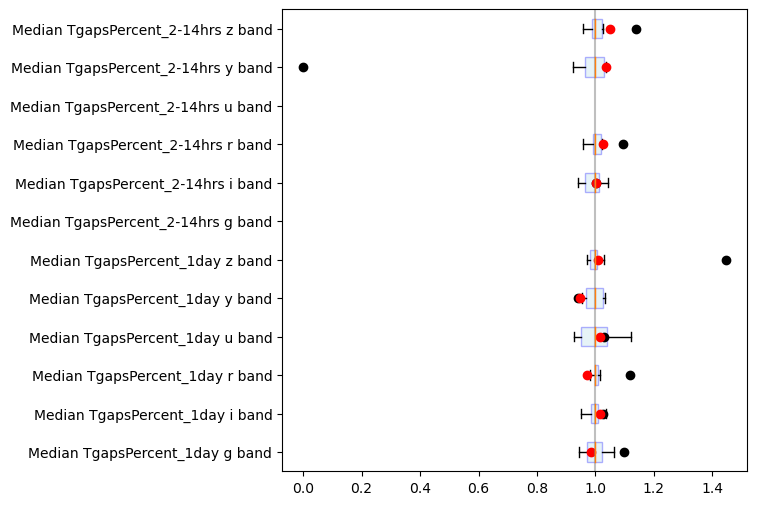

In [16]:
mset = 'TVS Tgaps'

normdf = maf.normalize_metric_summaries(clouds, summaries, metric_sets=metric_sets.loc[mset])
normdf.columns = normdf.columns.map(metric_sets.loc[mset].short_name)
metrics = normdf.columns
pos_y = np.arange(1, len(metrics)+1)

fig = plt.figure(figsize=(6, len(metric_sets.loc[mset])/2))
ax = plt.gca()
#bplot = plt.boxplot(normdf.loc[variants][metrics], vert=False, positions=pos_y, patch_artist=True, showfliers=True)
#for patch in bplot['boxes']:
#    patch.set(edgecolor='red', facecolor='pink', alpha=0.4)
bplot = plt.boxplot(normdf.loc[clouds][metrics], vert=False, positions=pos_y, patch_artist=True, showfliers=False)
for patch in bplot['boxes']:
    patch.set(edgecolor='blue', facecolor='lightblue', alpha=0.3)
for r in bruns:
    plt.plot(normdf.loc[r][metrics], pos_y, 'o', color=run_colors[r])
ax.set_yticks(pos_y)
ax.set_yticklabels(metrics)
plt.axvline(1, color='grey', linestyle='-', alpha=0.5)

summaries[metric_sets.loc[mset]['metric']]

Text(0, 0.5, 'N KNe TVS')

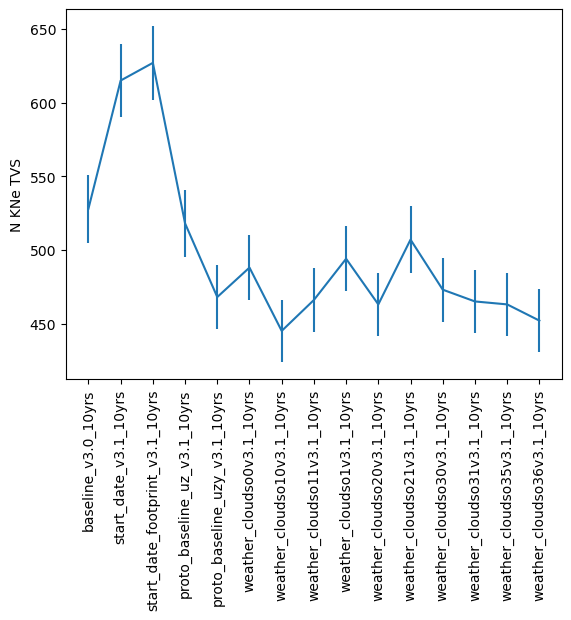

In [19]:
m = "Total detected KNePopMetric_single_ztfrest_simple single model UserPointsSlicer"
vv = variants + clouds 
y = summaries.loc[vv][m]
err = np.sqrt(y)
plt.errorbar(vv, y=y, yerr=err)
plt.xticks(rotation='vertical')
plt.ylabel("N KNe TVS")